In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import random
random.seed(3)

%run Classes.ipynb

[STATUS] Reference Saved
[STATUS] Skipping Tests


In [3]:
data = LightCurve("reference.csv")
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data.select_curve(phiRange = phi_range, mejdynRange = mejdyn_range, mejwindRange = mejwind_range)
data.selected
zBand = 900.0
data.extract_curve()
data.curve.head(2) # iobs goes from 0 --> 10 (11 rows)
# data.simple_plot(zBand)
# data.plot_viewingangle_simple()

wavelength                                             10.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             30.0    \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             50.0    \
iobs                                                            
0           [4.1465e-07, 1.3883e-06, 1.7753e-07, 2.6052e-0...   
1           [1.5032e-07, 1.4652e-06, 1.9802e-07, 2.5081e-0...   

wavelength                                             70.0    \
iobs                                                            
0           [9.1683e-06, 4.4819e-05, 9.8855e-06, 1.1481e-0...   
1           [8.0978e-06, 4.489e-05, 1.0097e-05, 0.00090249...   

wavelength                                             90.0    \
iobs                                                            
0           [8.3714e-05, 0.00025517, 8.129e-05, 2.384e-05,...   
1           [8.3075e-05, 0.00025799, 8.0892e-05, 2.4247e-0...   

wavelength                                             110.0   \
iobs                                                            
0           [0.00028939, 0.00085966, 0.00025527, 0.0001117...   
1           [0.00029871, 0.00092469, 0.0002547, 0.0001111,...   

wavelength                                             130.0   \
iobs                                                            
0           [0.00060159, 0.0015886, 0.0007023, 0.0002723, ...   
1           [0.00058962, 0.0018025, 0.00070055, 0.00027331...   

wavelength                                             150.0   \
iobs                                                            
0           [0.00079509, 0.0030784, 0.00080502, 0.00050972...   
1           [0.00078938, 0.0032975, 0.00080607, 0.00048103...   

wavelength                                             170.0   \
iobs                                                            
0           [0.0008913, 0.00566, 0.0013939, 0.00056179, 0....   
1           [0.00088974, 0.0060483, 0.0013921, 0.00056177,...   

wavelength                                             190.0   ...  \
iobs                                                           ...   
0           [0.0008789, 0.0050446, 0.0013068, 0.00060908, ...  ...   
1           [0.00087734, 0.0050459, 0.0011036, 0.00063516,...  ...   

wavelength                                             9810.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9830.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026573...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9850.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9870.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.768...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9890.0  \
iobs                                                            
0           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

wavelength                                             9910.0  \


[STATUS] Plotting for nph: [], mejdyn: [0.01], mejwind: [0.11], phi: [30], viewing_angle: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


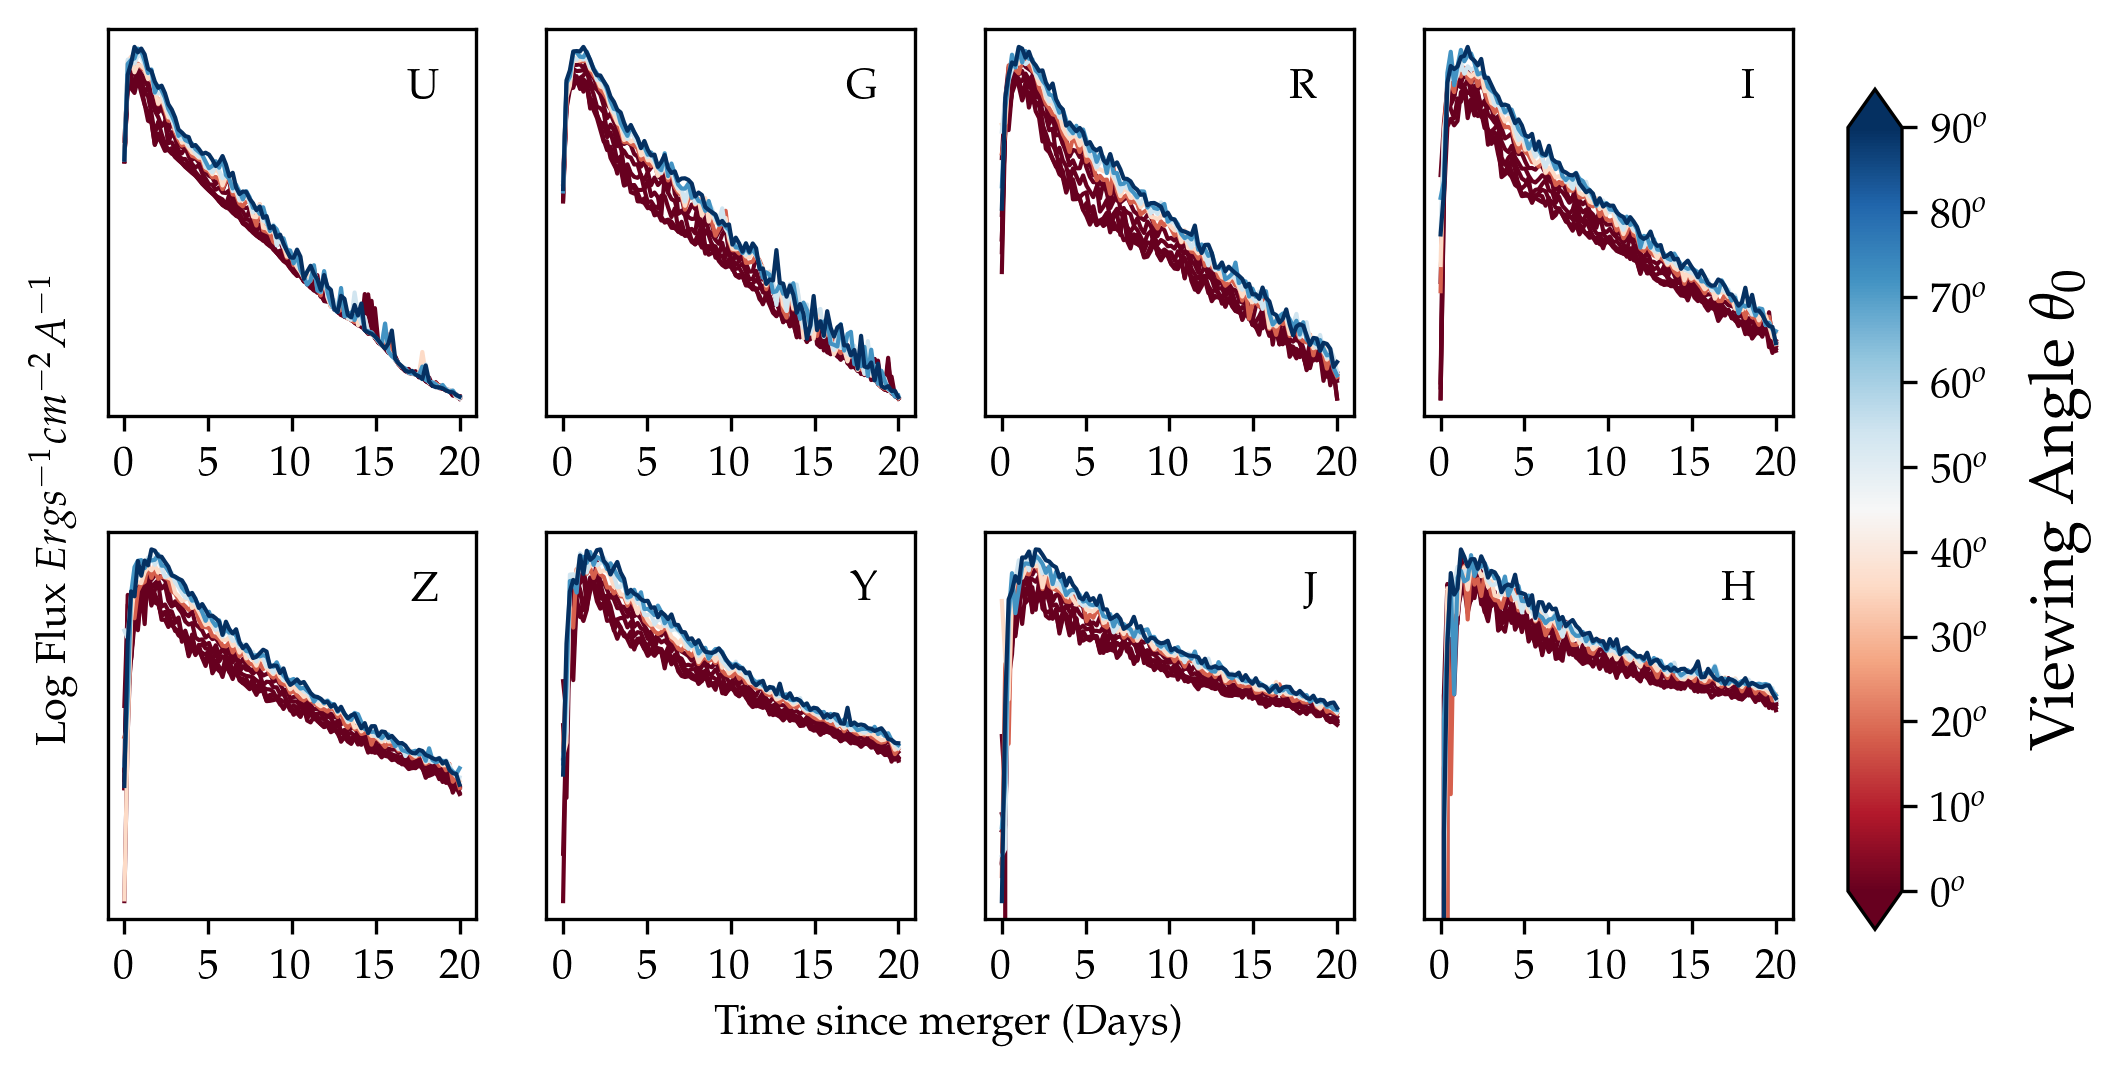

In [4]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range)
data.plot_viewingangle()

In [5]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
phi_range = [45]
mejwind_range = [0.13]
# data.select_mejdyn(wv_range, iobs_range, phi_range, mejwind_range)
# data.mejdyn
# data.plot_mejdyn(verbose = True)

In [6]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
phi_range = [45]
# data.select_mejwind(wv_range, iobs_range, phi_range, mejdyn_range)
# data.mejwind
# data.plot_mejwind(verbose = True)

In [7]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
mejwind_range = [0.11]
# data.select_phi(wv_range, iobs_range, mejwind_range, mejdyn_range)
# data.plot_phi(verbose = True)

# Gaussian Process Script

In [8]:
gp = GP("reference.csv")
phi_range = [45]
mejdyn_range = [0.01]
mejwind_range = [0.11]
wv = 900
gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
# gp.viewingangle

In [9]:
gp.single_time_step(1) # Want distribution at 1 day
gp.time_sliced
# gp.time_sliced_normed
# arr = gp.time_sliced.to_numpy()[0]
# plt.scatter(np.linspace(0,gp.Nobs,len(arr)), arr)

iobs             0         1         2         3         4         5   \
time_step                                                               
5          0.002709  0.002237  0.003472  0.003301  0.004151  0.005073   

iobs             6         7         8         9         10  
time_step                                                    
5          0.004041  0.005399  0.005223  0.005627  0.007347

In [10]:
gp.normedDF()

In [11]:
gp.setXY_viewingangle()
gp.set_kernel(GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2))
gp.set_model(GPy.models.GPRegression(gp.X, gp.Y, gp.kernel))

In [12]:
gp.set_predX(np.linspace(0,gp.Nobs,100).reshape(100, 1))

# # Manual
# gp.plot_prior(manual = True, sig = 2)
# gp.plot_covariance()
# cov1 = gp.cov

# # Automatic
# gp.plot_prior(manual = False, title = "Untrained Posterior")
# gp.plot_covariance()
# cov2 = gp.cov

# # Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()


Name : GP regression
Objective : -1.3297537698986739
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    0.5048741357115837  |      +ve      |        
  rbf.lengthscale          |    10.237731281822857  |      +ve      |        
  Gaussian_noise.variance  |  0.019581516431695353  |      +ve      |        


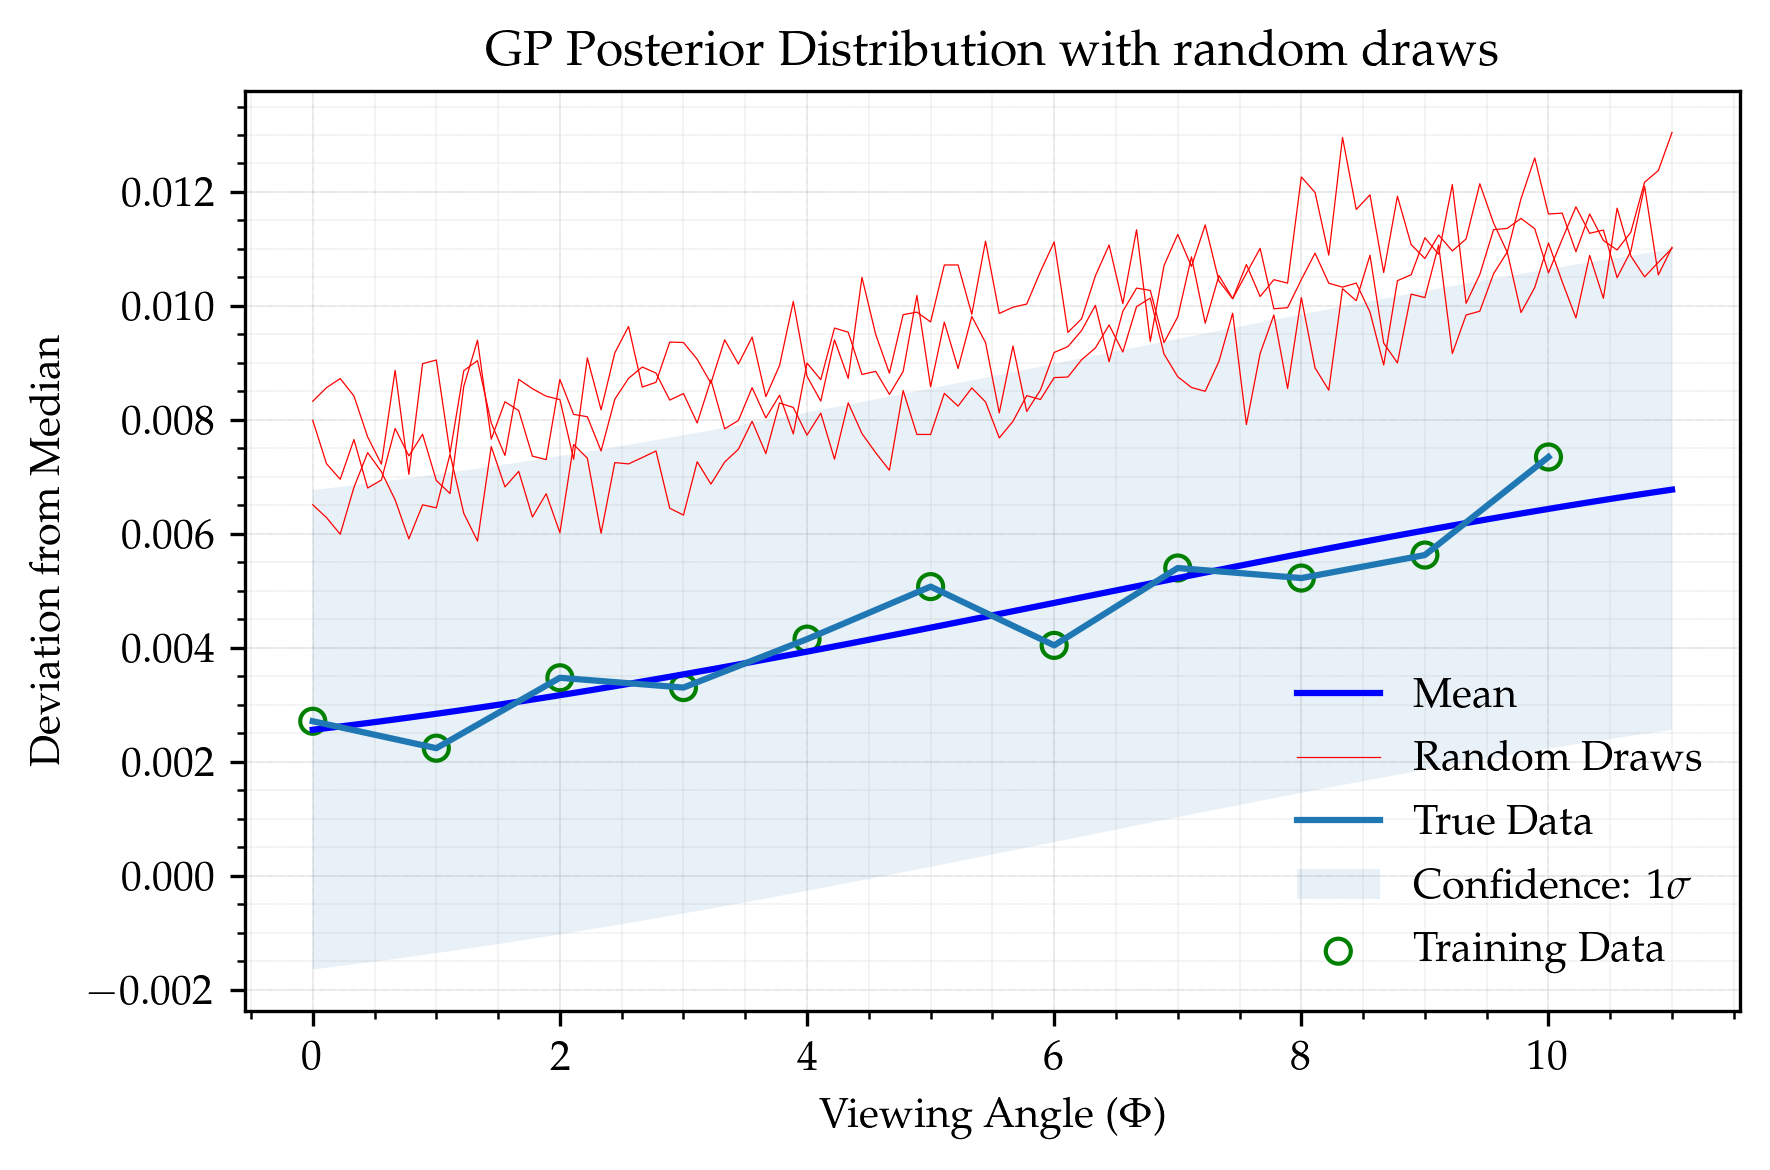

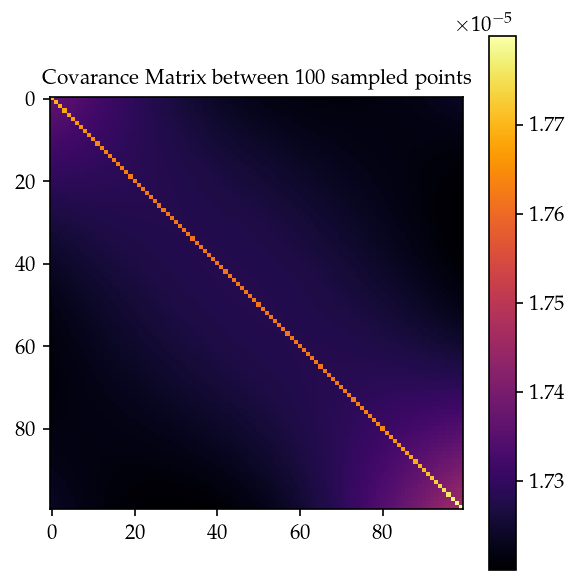

In [13]:
gp.model_train(verbose = True)

# # Manual
# gp.plot_posterior(manual = True)
# gp.plot_covariance()
# cov1 = gp.cov

# Automatic
gp.plot_posterior(manual = False, include_like = True)
plt.plot(gp.X.T[0], gp.time_sliced.to_numpy()[0], label = "True Data")
plt.legend()
gp.plot_covariance()
cov2 = gp.cov
# Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()

# LOO Cross Validation

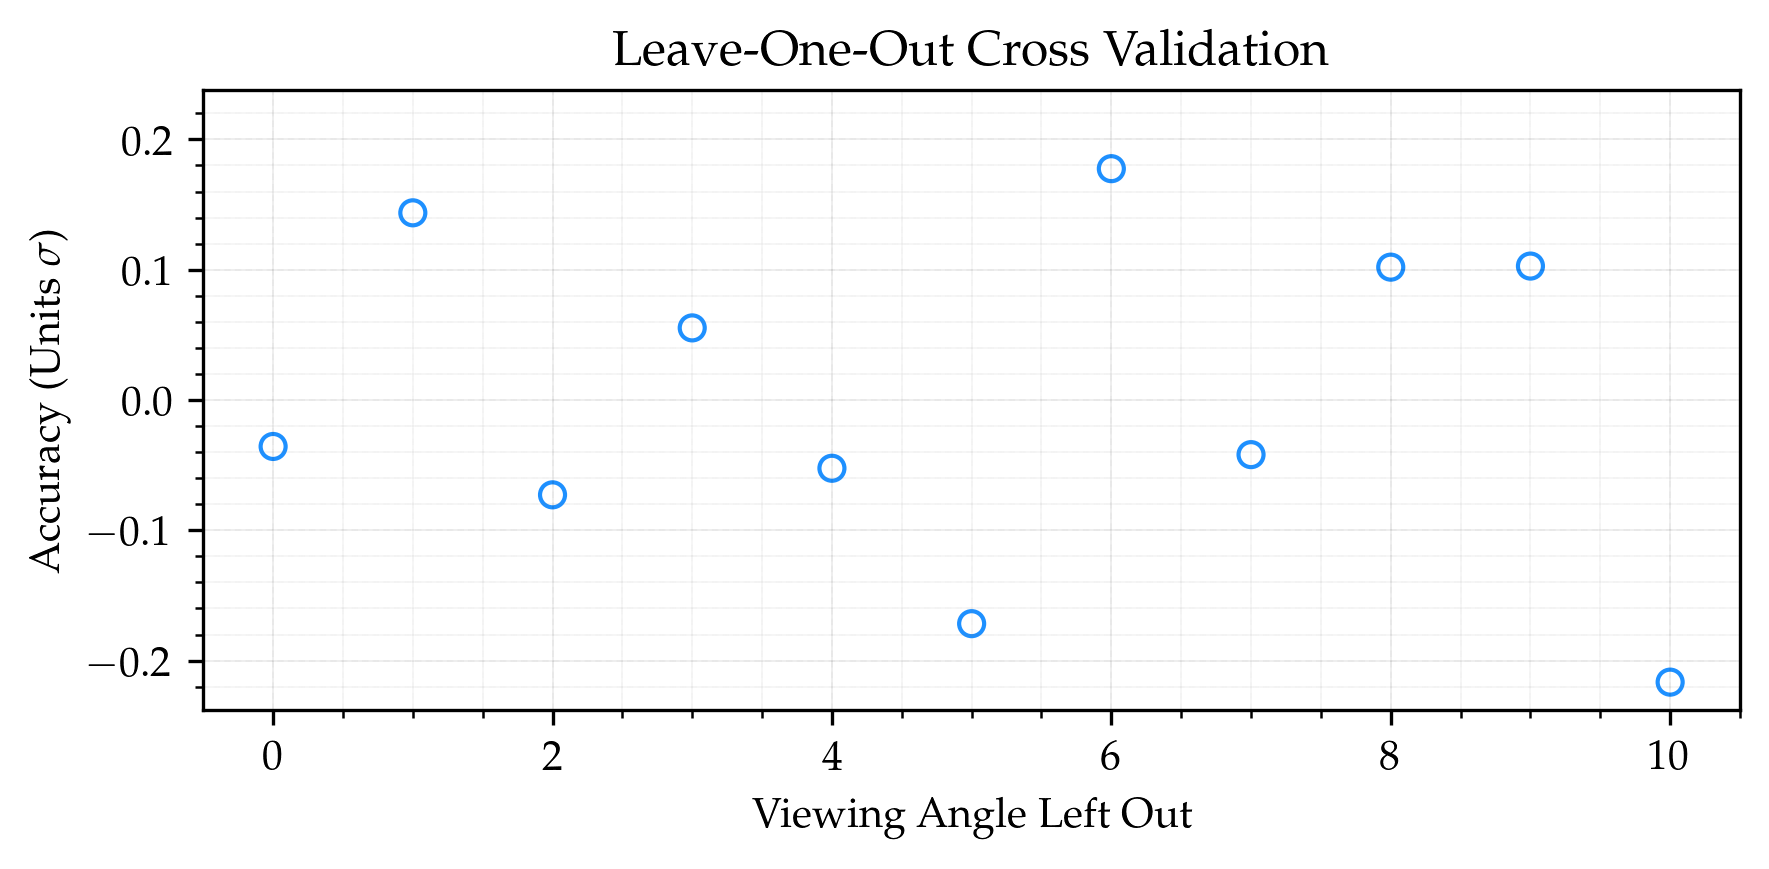

In [14]:
gp.LOOCV()
# gp.plot_loocv_simple()
gp.plot_loocv()
# gp.LOOCV(manual = False)

# Multiple GP LOO-CV

In [15]:
gp = GP("reference.csv")
gp.multiple_LOOCV(N = 196, verbose = True)
gp.loo_list_multiple.shape

  5%|▍         | 9/196 [00:10<02:57,  1.05it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.010_phi0.txt 
does not have the correct number of viewing angles. Skipping...


  6%|▌         | 12/196 [00:12<02:29,  1.23it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.090_phi90.txt 
does not have the correct number of viewing angles. Skipping...


  7%|▋         | 14/196 [00:13<02:05,  1.45it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.070_phi90.txt 
does not have the correct number of viewing angles. Skipping...


  9%|▊         | 17/196 [00:15<01:30,  1.97it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.090_phi0.txt 
does not have the correct number of viewing angles. Skipping...
[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.030_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 12%|█▏        | 24/196 [00:22<02:24,  1.19it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.130_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 13%|█▎        | 26/196 [00:24<02:06,  1.34it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.070_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 14%|█▍        | 28/196 [00:25<01:58,  1.42it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.090_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 16%|█▌        | 31/196 [00:28<02:06,  1.31it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.130_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 19%|█▉        | 37/196 [00:34<02:16,  1.16it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.010_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 22%|██▏       | 43/196 [00:39<01:38,  1.55it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.070_phi90.txt 
does not have the correct number of viewing angles. Skipping...
[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.130_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 26%|██▌       | 50/196 [00:47<02:12,  1.10it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.050_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 28%|██▊       | 54/196 [00:52<02:09,  1.10it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.110_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 33%|███▎      | 64/196 [01:04<02:20,  1.06s/it]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.110_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 34%|███▍      | 67/196 [01:07<02:03,  1.04it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.010_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 35%|███▍      | 68/196 [01:07<01:34,  1.35it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.050_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 35%|███▌      | 69/196 [01:08<01:14,  1.70it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.030_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 36%|███▌      | 70/196 [01:08<01:03,  1.98it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.010_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 40%|███▉      | 78/196 [01:18<01:54,  1.03it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.030_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 41%|████      | 80/196 [01:19<01:29,  1.29it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.030_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 44%|████▍     | 86/196 [01:24<01:11,  1.54it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.110_phi90.txt 
does not have the correct number of viewing angles. Skipping...
[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.110_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 44%|████▍     | 87/196 [01:24<00:56,  1.94it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.070_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 47%|████▋     | 92/196 [01:29<01:24,  1.23it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.130_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 47%|████▋     | 93/196 [01:30<01:05,  1.57it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.050_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 49%|████▉     | 97/196 [01:34<01:18,  1.26it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.050_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 50%|█████     | 98/196 [01:34<01:00,  1.62it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.090_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 51%|█████     | 99/196 [01:34<00:47,  2.02it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.030_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 51%|█████     | 100/196 [01:34<00:39,  2.44it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.030_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 52%|█████▏    | 101/196 [01:34<00:33,  2.87it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.070_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 58%|█████▊    | 114/196 [01:50<01:16,  1.07it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.110_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 63%|██████▎   | 123/196 [02:00<01:06,  1.10it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.030_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 64%|██████▍   | 125/196 [02:01<00:53,  1.32it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.050_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 66%|██████▋   | 130/196 [02:06<00:55,  1.19it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.090_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 67%|██████▋   | 132/196 [02:07<00:32,  1.95it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.130_phi90.txt 
does not have the correct number of viewing angles. Skipping...
[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.110_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 73%|███████▎  | 143/196 [02:19<00:47,  1.12it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.050_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 77%|███████▋  | 150/196 [02:26<00:40,  1.14it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.070_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 77%|███████▋  | 151/196 [02:26<00:30,  1.48it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.010_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 78%|███████▊  | 152/196 [02:27<00:23,  1.86it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.050_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 78%|███████▊  | 153/196 [02:27<00:18,  2.28it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.090_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 80%|███████▉  | 156/196 [02:29<00:26,  1.51it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.130_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 81%|████████  | 158/196 [02:31<00:24,  1.55it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.030_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 82%|████████▏ | 161/196 [02:34<00:25,  1.36it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.010_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 86%|████████▌ | 169/196 [02:41<00:17,  1.53it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.130_phi90.txt 
does not have the correct number of viewing angles. Skipping...
[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.010_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 89%|████████▉ | 174/196 [02:46<00:17,  1.25it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.110_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 90%|████████▉ | 176/196 [02:47<00:14,  1.41it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.090_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 91%|█████████▏| 179/196 [02:50<00:13,  1.29it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.010_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 95%|█████████▍| 186/196 [02:58<00:09,  1.10it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.010_mejwind0.070_phi90.txt 
does not have the correct number of viewing angles. Skipping...


 96%|█████████▌| 188/196 [02:59<00:06,  1.27it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.130_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 97%|█████████▋| 190/196 [03:01<00:04,  1.42it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.050_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 98%|█████████▊| 193/196 [03:02<00:01,  1.97it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.005_mejwind0.110_phi0.txt 
does not have the correct number of viewing angles. Skipping...
[STATUS] File selected at nph1.0e+06_mejdyn0.001_mejwind0.090_phi0.txt 
does not have the correct number of viewing angles. Skipping...


 99%|█████████▉| 194/196 [03:03<00:00,  2.38it/s]

[STATUS] File selected at nph1.0e+06_mejdyn0.020_mejwind0.070_phi0.txt 
does not have the correct number of viewing angles. Skipping...


100%|██████████| 196/196 [03:05<00:00,  1.06it/s]


(140, 11)

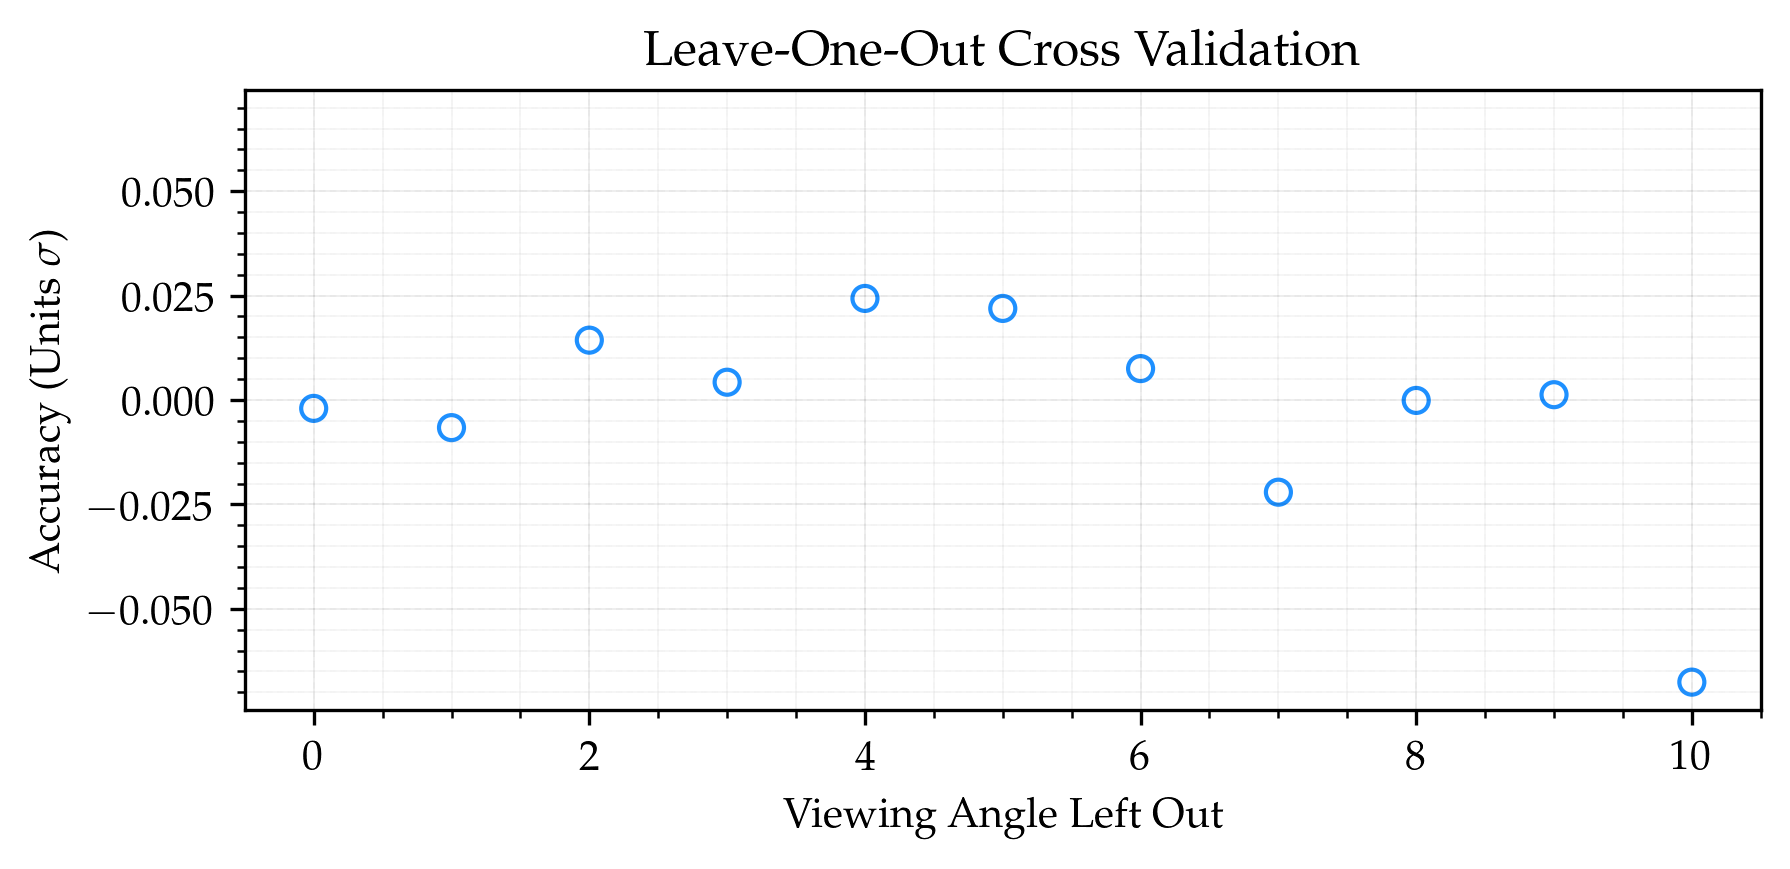

In [16]:
gp.plot_loocv(plot_type = "multiple")

# Multi-Dimensional Gaussian Process

In [17]:
gp = GP("reference.csv")
phi_range = [45]
mejwind_range = []
mejdyn_range = [0.01]
wv = 900
gp.select_curve(phiRange = phi_range, mejwindRange = mejwind_range, mejdynRange = mejdyn_range)
mejdyn_range_list = gp.selected.mejwind.unique()
mejdyn_range_list

array([0.09, 0.01, 0.03, 0.11, 0.05, 0.13, 0.07])

In [18]:
gp = GP("reference.csv")

df = None
for i in tqdm(range(len(mejdyn_range_list))):
    tempSelected = gp.selected
    mejwind_range = [mejdyn_range_list[i]]
    gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
    gp.single_time_step(1) # Want distribution at 1 day
    temp_df = gp.time_sliced
    df = pd.concat([df, temp_df])
    gp.selected = tempSelected

df.index = mejdyn_range_list
df.index.name = "mejdyn"
df.reset_index(drop = True)
df # At time step 1 day THIS IS A 2D MATRIX FOR ALL THE TRAINING DATA

100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


iobs          0         1         2         3         4         5         6   \
mejdyn                                                                         
0.09    0.004226  0.004391  0.003271   0.00357  0.003111  0.003833  0.005173   
0.01     0.00094  0.001149  0.000957  0.001401   0.00163  0.001967  0.002316   
0.03    0.001715  0.001994  0.002391  0.002375  0.003032  0.003081  0.003541   
0.11    0.002709  0.002237  0.003472  0.003301  0.004151  0.005073  0.004041   
0.05     0.00371  0.003648  0.003052  0.003065  0.003118  0.003309  0.003955   
0.13    0.003939  0.002823  0.003407  0.003504  0.003451    0.0063   0.00809   
0.07     0.00368   0.00317  0.002804  0.002552  0.002415  0.003475  0.003557   

iobs          7         8         9         10  
mejdyn                                          
0.09    0.004162  0.004858  0.006088  0.005133  
0.01    0.002703  0.002073  0.003047  0.003373  
0.03    0.004127  0.004388  0.004341  0.004753  
0.11    0.005399  0.005223  0.005627  0.007347  
0.05    0.004744  0.005699  0.005692  0.006823  
0.13     0.01049  0.009124  0.006332  0.006862  
0.07    0.003743  0.004695  0.003848  0.005946

In [19]:
X1 = np.linspace(0, 10, gp.Nobs, endpoint = True)
X2 = np.array(mejdyn_range_list)
Y = df.to_numpy(dtype = float).flatten()
Y = Y.reshape(len(Y), 1)
_X1, _X2 = np.meshgrid(X1, X2)
_X1 = _X1.flatten()
_X1 = _X1.reshape(len(_X1), 1)
_X2 = _X2.flatten()
_X2 = _X2.reshape(len(_X2), 1)
X = np.hstack([_X1, _X2])

kernel = GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10)
m2 = GPy.models.GPRegression(X,Y,kernel)

In [20]:
m2.optimize(messages = True)

In [21]:
N = 20
PredX1 = np.linspace(0, 10, N, endpoint = True)
PredX2 = np.linspace(min(mejdyn_range_list), max(mejdyn_range_list), N, endpoint = True)
_X1Pred, _X2Pred = np.meshgrid(PredX1, PredX2)
_X1Pred = _X1Pred.flatten()
_X1Pred = _X1Pred.reshape(len(_X1Pred), 1)
_X2Pred = _X2Pred.flatten()
_X2Pred = _X2Pred.reshape(len(_X2Pred), 1)
predX = np.hstack([_X1Pred, _X2Pred])
mean, cov = m2.predict(predX, full_cov = True, include_likelihood = True)
print(mean.shape, cov.shape, predX.shape)

(400, 1) (400, 400) (400, 2)


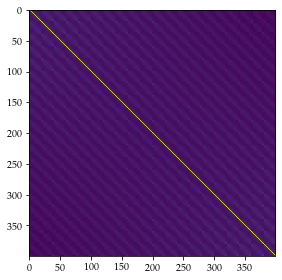

In [22]:
plt.imshow(cov, interpolation = "None")

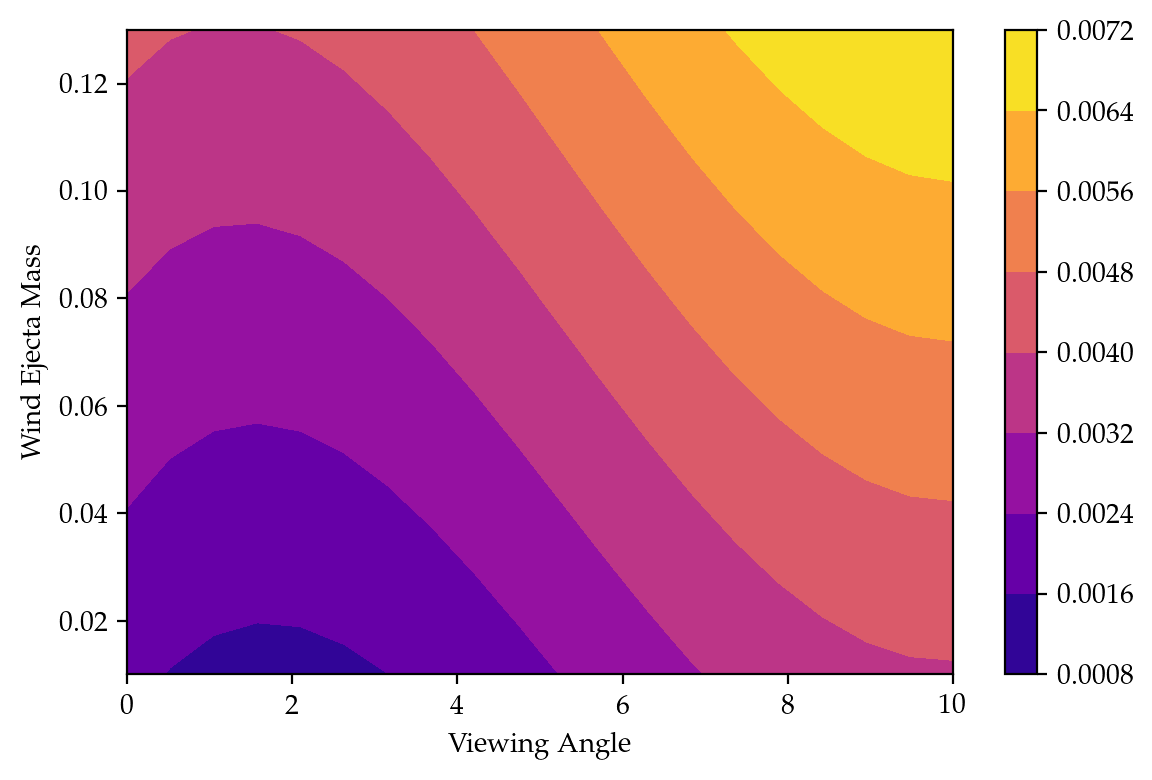

In [23]:
plt.figure(dpi = 200)
plt.tight_layout()
contours = plt.contourf(PredX1, PredX2, mean.reshape(N, N), cmap = "plasma")
# plt.clabel(contours, inline=True, fontsize=9, colors = "white")
plt.colorbar()
plt.xlabel("Viewing Angle")
plt.ylabel("Wind Ejecta Mass")
plt.show()

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7ffe264a1820>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7ffe3ce65130>]}

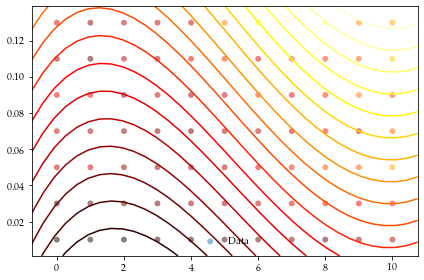

In [24]:
m2.plot()